#**SPOTIFY DATA ANALYSIS**

Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset= pd.read_csv('/content/spotify-2023.csv', encoding='latin-1')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
dataset[dataset.columns[:]].nunique()

track_name              943
artist(s)_name          645
artist_count              8
released_year            50
released_month           12
released_day             31
in_spotify_playlists    879
in_spotify_charts        82
streams                 949
in_apple_playlists      234
in_apple_charts         172
in_deezer_playlists     348
in_deezer_charts         34
in_shazam_charts        198
bpm                     124
key                      11
mode                      2
danceability_%           72
valence_%                94
energy_%                 80
acousticness_%           98
instrumentalness_%       39
liveness_%               68
speechiness_%            48
dtype: int64

In [6]:
dataset.shape

(953, 24)

In [7]:
#checking if we have null values in our dataset
dataset.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [8]:
#Dropping the missing values
dataset.dropna(inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            817 non-null    object
 1   artist(s)_name        817 non-null    object
 2   artist_count          817 non-null    int64 
 3   released_year         817 non-null    int64 
 4   released_month        817 non-null    int64 
 5   released_day          817 non-null    int64 
 6   in_spotify_playlists  817 non-null    int64 
 7   in_spotify_charts     817 non-null    int64 
 8   streams               817 non-null    object
 9   in_apple_playlists    817 non-null    int64 
 10  in_apple_charts       817 non-null    int64 
 11  in_deezer_playlists   817 non-null    object
 12  in_deezer_charts      817 non-null    int64 
 13  in_shazam_charts      817 non-null    object
 14  bpm                   817 non-null    int64 
 15  key                   817 non-null    ob

In [10]:
#converting the streams and in_shazam_charts columns from object to integer/float
dataset['streams'] = pd.to_numeric(dataset['streams'], errors='coerce')
dataset['in_shazam_charts'] = pd.to_numeric(dataset['in_shazam_charts'], errors='coerce')

In [11]:
dataset['streams'].dtype

dtype('float64')

In [12]:
dataset['in_shazam_charts'].dtype

dtype('float64')

In [13]:
'''Here I am trying to map the track names to a track ID, and hence i am converting a categorical columns to a numerical
form, which is often necessary for numerical computation, statistical analyis and machine learning algorithms'''

track_name_to_id = {name: indx for indx, name in enumerate(dataset['track_name'].unique())}

dataset['track_id'] = dataset['track_name'].map(track_name_to_id)
dataset.drop(columns=['track_name'], inplace=True)

In [14]:
dataset.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,track_id
0,"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,263,45,10,826.0,125,B,Major,80,89,83,31,0,8,4,0
1,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,126,58,14,382.0,92,C#,Major,71,61,74,7,0,10,4,1
2,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,207,91,14,949.0,138,F,Major,51,32,53,17,0,31,6,2
3,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,207,125,12,548.0,170,A,Major,55,58,72,11,0,11,15,3
4,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,133,87,15,425.0,144,A,Minor,65,23,80,14,63,11,6,4


In [15]:
dataset.columns

Index(['artist(s)_name', 'artist_count', 'released_year', 'released_month',
       'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%', 'track_id'],
      dtype='object')

In [16]:
n_col = ['track_id', 'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%']

#rearranging the columns and creating a new dataframe for further analysis
df = dataset[n_col]
df.head()

,track_id,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0,553,147,141381703.0,43,263,45,10,826.0,125,B,Major,80,89,83,31,0,8,4
1,1,1474,48,133716286.0,48,126,58,14,382.0,92,C#,Major,71,61,74,7,0,10,4
2,2,1397,113,140003974.0,94,207,91,14,949.0,138,F,Major,51,32,53,17,0,31,6
3,3,7858,100,800840817.0,116,207,125,12,548.0,170,A,Major,55,58,72,11,0,11,15
4,4,3133,50,303236322.0,84,133,87,15,425.0,144,A,Minor,65,23,80,14,63,11,6


In [17]:
#Getting the dummy variable for the categorical columns key and mode in the dataframe
df = pd.get_dummies(df, columns=['key', 'mode'])
df.head()

,track_id,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,553,147,141381703.0,43,263,45,10,826.0,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1474,48,133716286.0,48,126,58,14,382.0,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2,1397,113,140003974.0,94,207,91,14,949.0,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,7858,100,800840817.0,116,207,125,12,548.0,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,3133,50,303236322.0,84,133,87,15,425.0,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


In [18]:
#rename certain columns for better readability
rename_col = {'danceability_%': 'danceability', 'valence_%': 'valence', 'energy_%': 'energy',
              'acousticness_%': 'acousticness', 'instrumentalness_%': 'instrumentalness',
              'liveness_%': 'liveness', 'speechiness_%': 'speechiness'}

df.rename(columns=rename_col, inplace=True)
df.head()

,track_id,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0,553,147,141381703.0,43,263,45,10,826.0,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1474,48,133716286.0,48,126,58,14,382.0,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,2,1397,113,140003974.0,94,207,91,14,949.0,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3,7858,100,800840817.0,116,207,125,12,548.0,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,4,3133,50,303236322.0,84,133,87,15,425.0,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
df_new = df.drop(columns=['track_id'])
df_new.head()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,553,147,141381703.0,43,263,45,10,826.0,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1474,48,133716286.0,48,126,58,14,382.0,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1397,113,140003974.0,94,207,91,14,949.0,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,7858,100,800840817.0,116,207,125,12,548.0,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,3133,50,303236322.0,84,133,87,15,425.0,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


In [20]:
#Scaling the some of the columns which has very high values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_new['in_spotify_playlists'] = scaler.fit_transform(df_new['in_spotify_playlists'].values.reshape(-1, 1))
df_new['streams'] = scaler.fit_transform(df_new['streams'].values.reshape(-1, 1))
df_new['in_apple_charts'] = scaler.fit_transform(df_new['in_apple_charts'].values.reshape(-1, 1))
df_new['in_shazam_charts'] = scaler.fit_transform(df_new['in_shazam_charts'].values.reshape(-1, 1))

In [21]:
df_new.head()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.009874,147,0.039685,43,0.956364,45,10,0.866737,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.027295,48,0.037533,48,0.458182,58,14,0.400839,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.025838,113,0.039298,94,0.752727,91,14,0.995803,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.148051,100,0.224794,116,0.752727,125,12,0.575026,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.058676,50,0.085117,84,0.483636,87,15,0.445960,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
correlation = df_new.corr()

<ipython-input-22-5672043ab212>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_new.corr()


<Axes: >

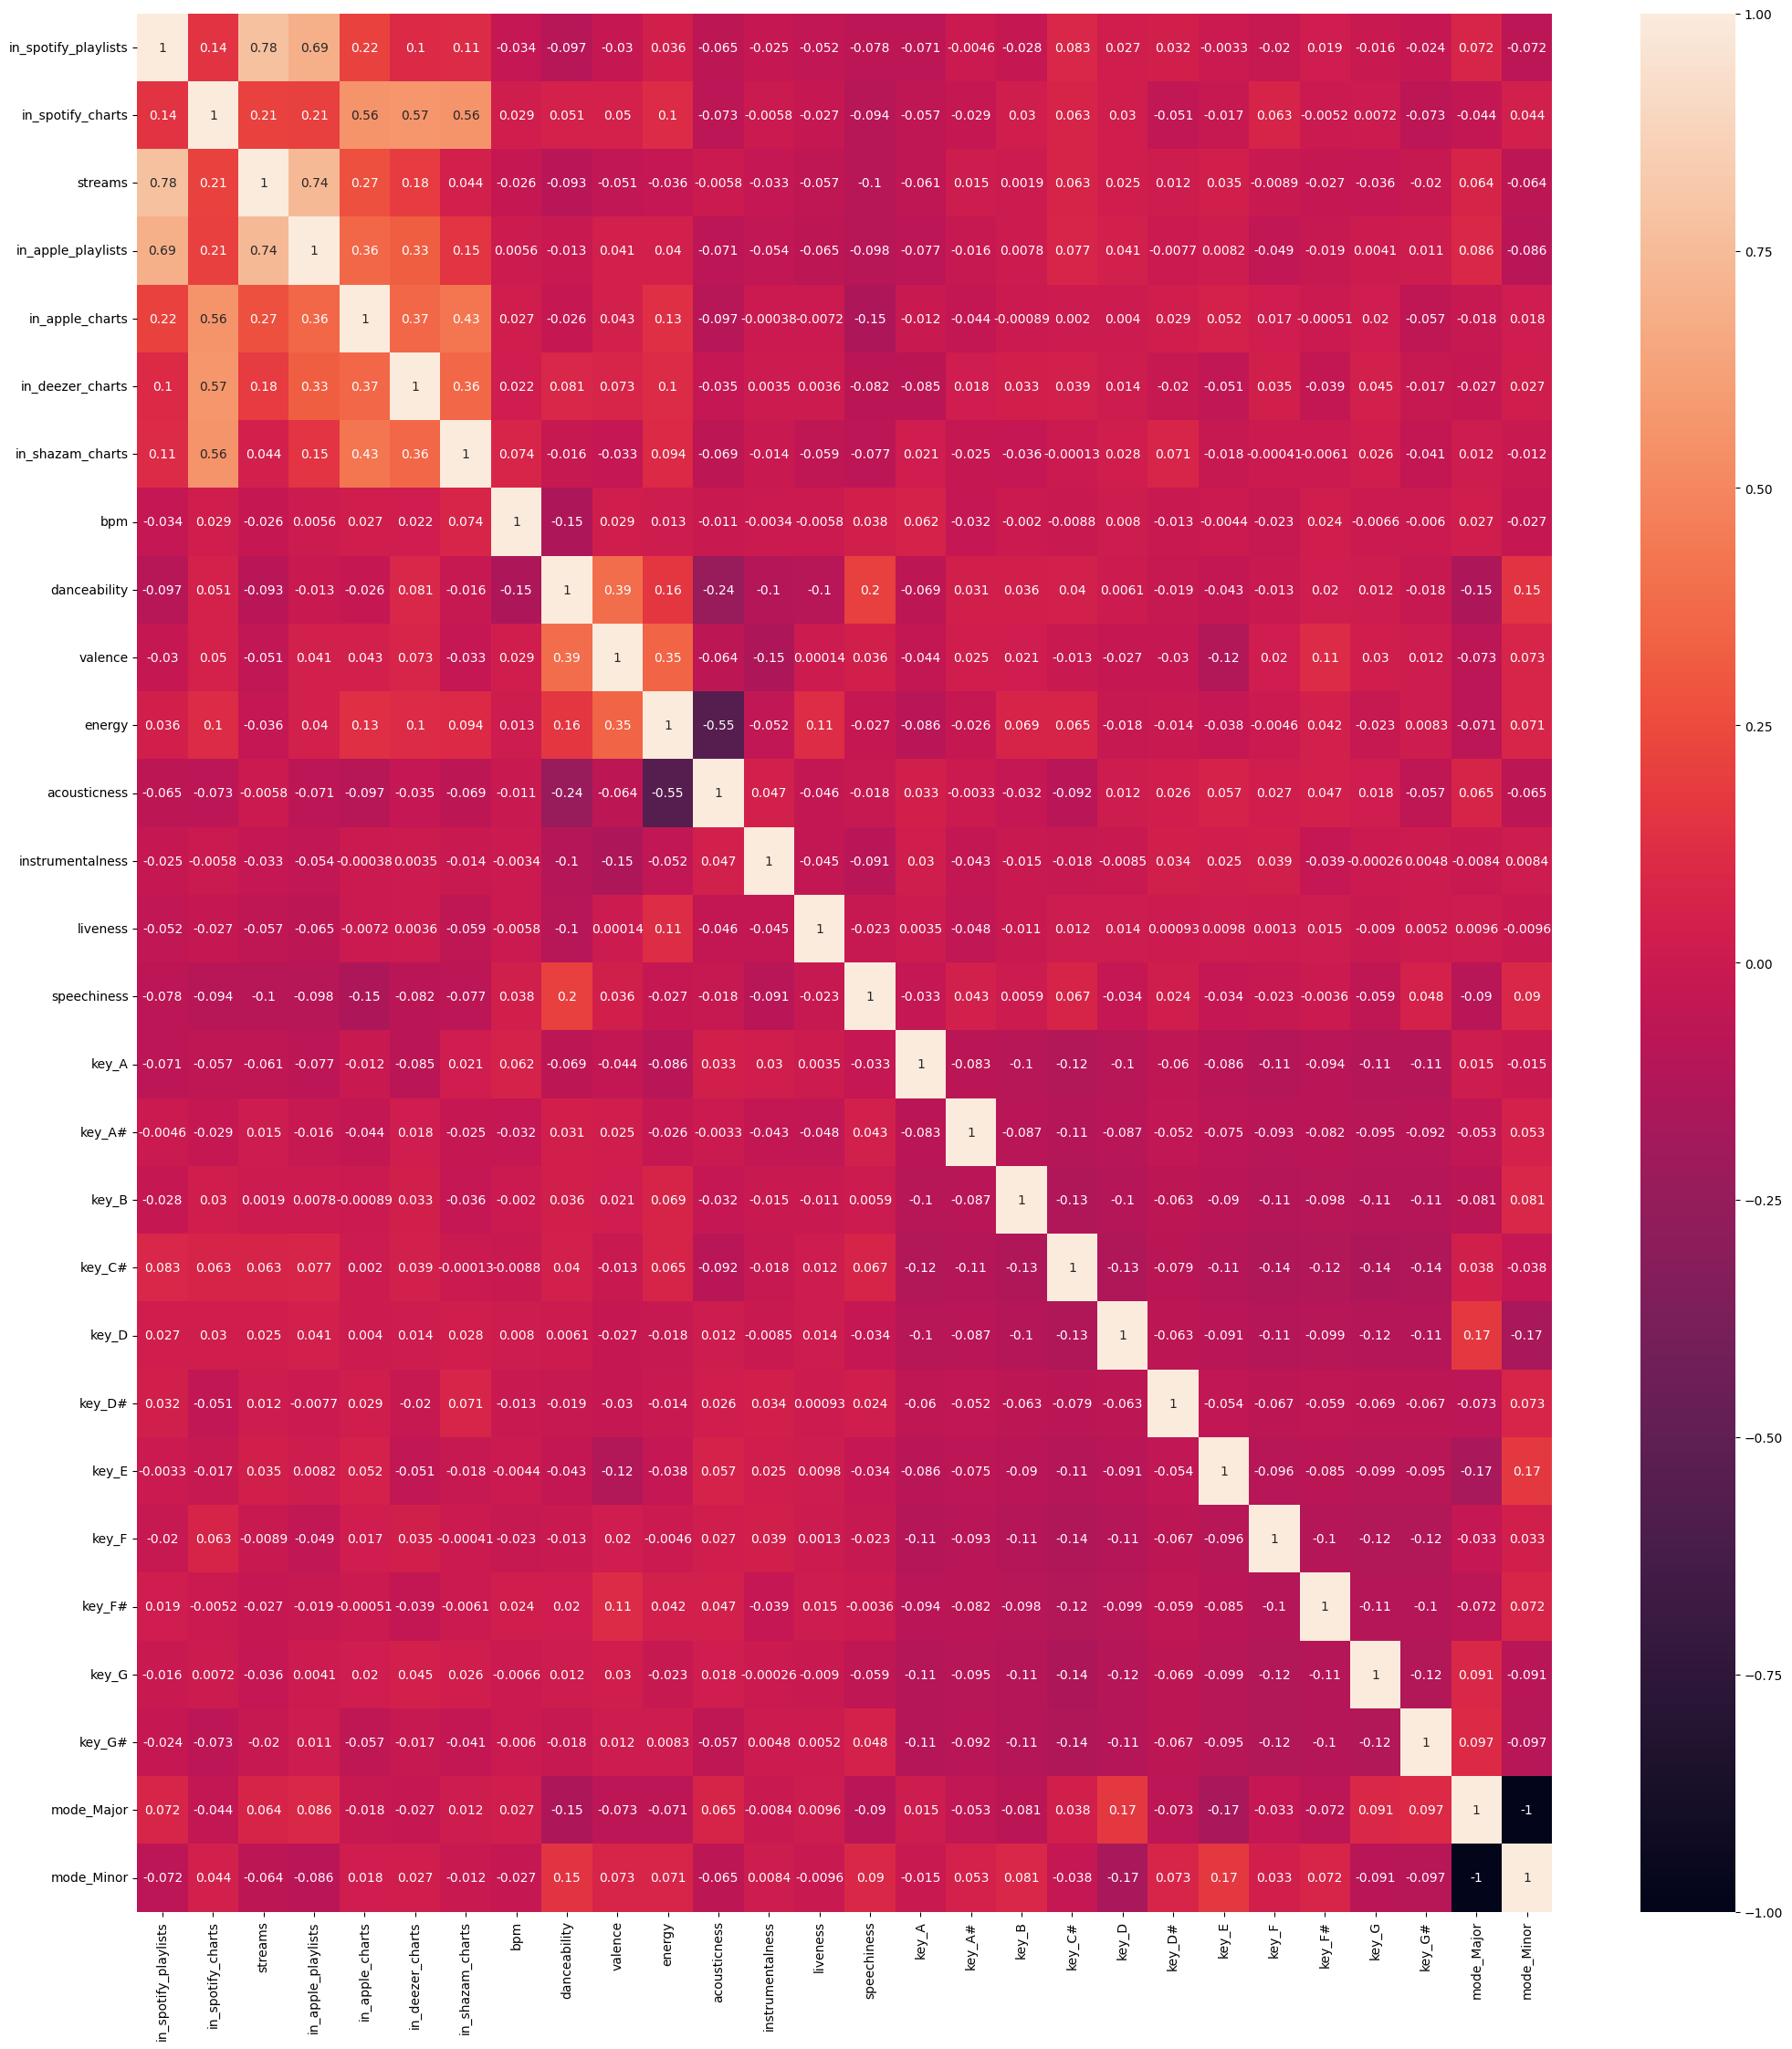

In [23]:
#Plotting the correlation between all the features
plt.figure(figsize=(25,27))
sns.heatmap(data= correlation, annot=True)

In [24]:
'''Creating a new dataframe to figure out the patterns between different set of features and checking there correlation with the
number of streams on spotify'''

scaled_df = df_new.drop(columns=['in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts','key_A', 'key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'], axis=1)


<Axes: >

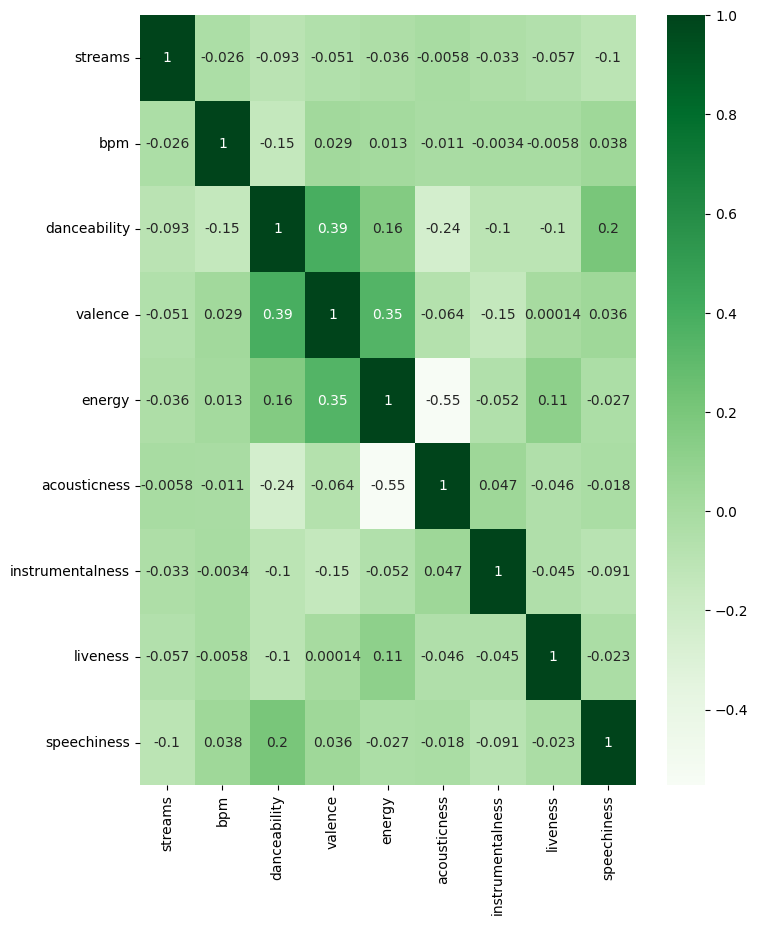

In [25]:
plt.figure(figsize=(8,10))
sns.heatmap(data= scaled_df.corr(), annot=True, cmap='Greens')

<Axes: xlabel='speechiness', ylabel='streams'>

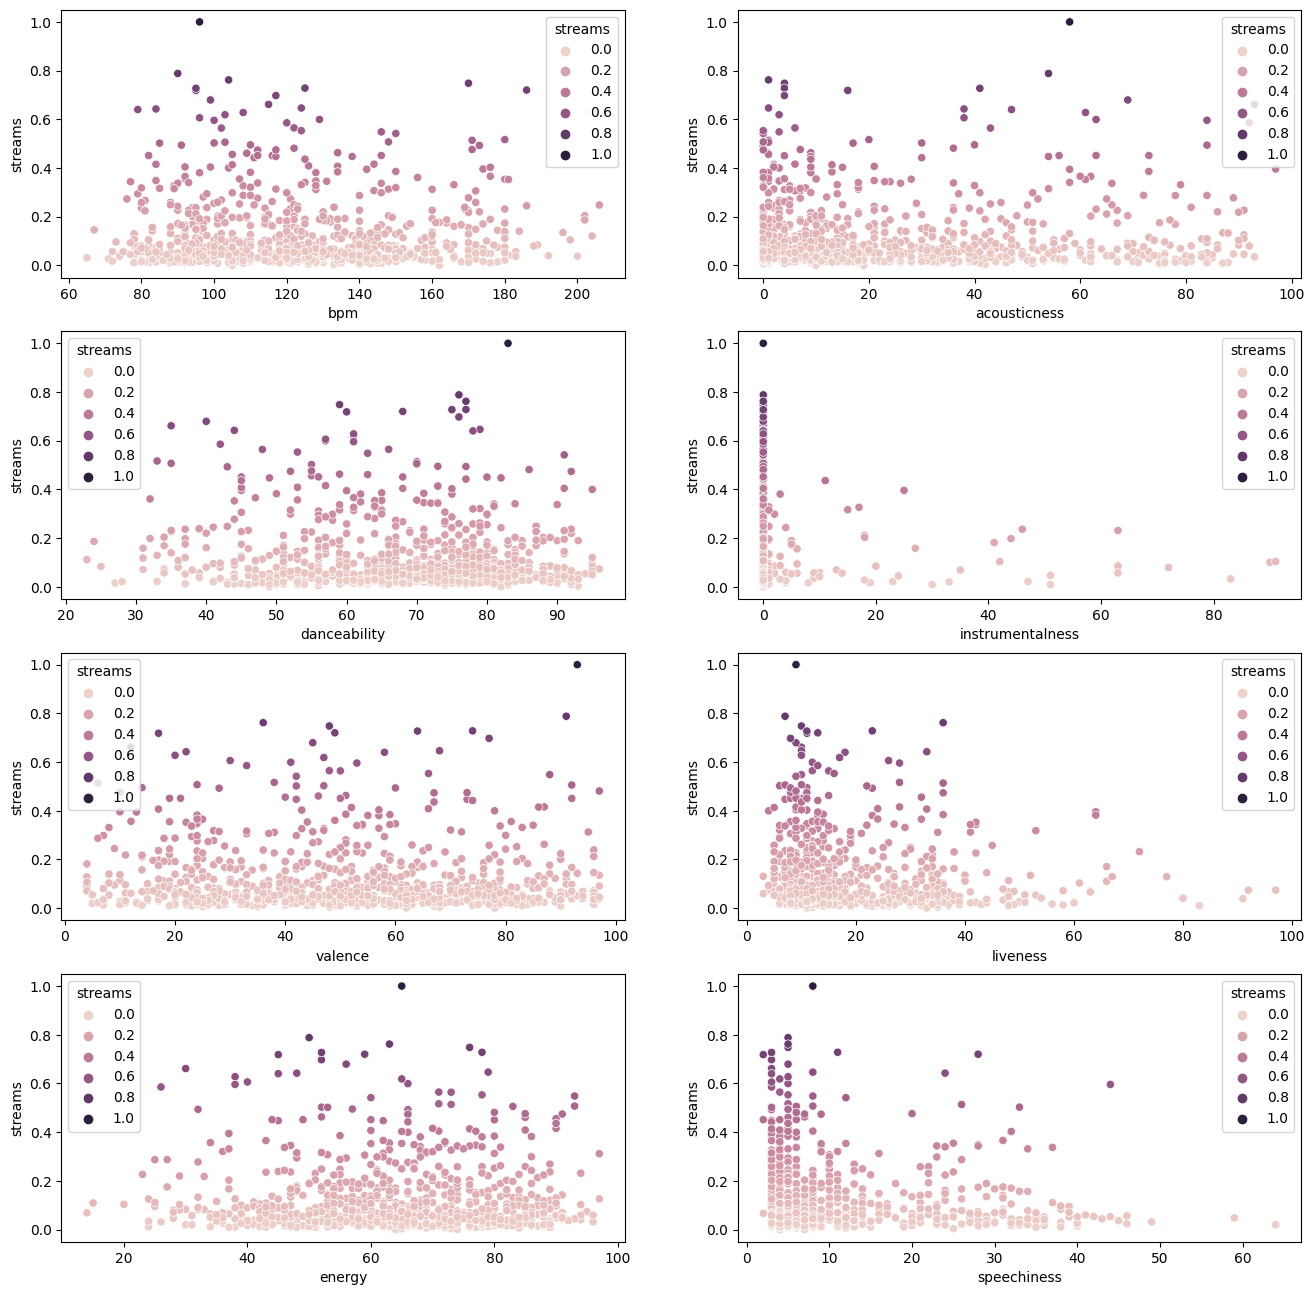

In [26]:
#Plotting the relation between high number of streams with differnt song features

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
sns.scatterplot(x="bpm", y="streams", data=scaled_df, hue='streams', ax=axes[0, 0])
sns.scatterplot(x="danceability", y="streams", data=scaled_df, hue='streams', ax=axes[1, 0])
sns.scatterplot(x="valence", y="streams", data=scaled_df, hue='streams', ax=axes[2, 0])
sns.scatterplot(x="energy", y="streams", data=scaled_df, hue='streams', ax=axes[3, 0])
sns.scatterplot(x="acousticness", y="streams", data=scaled_df, hue='streams', ax=axes[0, 1])
sns.scatterplot(x="instrumentalness", y="streams", data=scaled_df, hue='streams', ax=axes[1, 1])
sns.scatterplot(x="liveness", y="streams", data=scaled_df, hue='streams', ax=axes[2, 1])
sns.scatterplot(x="speechiness", y="streams", data=scaled_df, hue='streams', ax=axes[3, 1])

#**Analysis**

##Streams VS BPM:
The BPM in a song if the beats per minute. According to the plot, the data points is kind of evenly spread out with most streams having a bpm level between 90 and 100, whereas the song with higher and lower level of bpm also have a high number of streams on spotify.

##Streams VS Acousticness:
As per the scatterpot, the most number of streams is for the track that has accousticness level between 55 to 60, whereas a fair amount of streams are for track with minimum acoustic levels as well. For track names with minimum number of streams are spread out on all accoustic levels.

##Streams VS Danceability:
The track number with most streams on spotify has a danceabilty level between 80 to 85. Most of the songs wheather they are streamed the most of the least have high danceability level. Very few of the songs have good streaming number which has a low danceabilty level.

##Streams VS Instrumentalness:
According to the plot, most number of streams are for the songs that have zero instrumentals in them, which clearly states the audience/people love the songs with more vocal component, rather than instrumental. There are few excption ofcource which has decent stream with high instrumental presence in a song.

##Streams VS Valence:
As the valence in a song increases the number of streams for the song also increases. As per the plot, the most number of streams of a song has value between 90 and 100. A valence in a song is the positiveness conveyed by it. The more positive a song, more people will like it.

##Streams VS Liveliness:
Liveliness in a music is refered to reverberation time. The more lively a song is the less likely it is to be streamed as shown by the data points in the plot. The most streamed song in terms of liveliness has a level between 5 to 15.

##Streams VS Energy:
As per the plot, more energetic a song is, more likely it is to hit the charts. The most streamed song in terms of energy levels has a value between 60 to 70. Most of the song data points lie in the region of high energy levels no matter if the song has high steaming number of low.

##Streams VS Speechiness:
Spechiness is the presence of spoken words in a track. The more exclusively speech like the recording the closer its value to 1, which is described by the plot. The more likely a song to be streamed, the less its value in term of speechiness.

In [27]:
scaled_df_charts = df_new.drop(columns=['bpm', 'danceability', 'valence', 'energy', 'acousticness',
       'instrumentalness', 'liveness', 'speechiness','key_A','key_A#', 'key_B', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#', 'mode_Major',
       'mode_Minor'])

In [28]:
scaled_df_charts.columns

Index(['in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts'],
      dtype='object')

<Axes: xlabel='in_shazam_charts', ylabel='streams'>

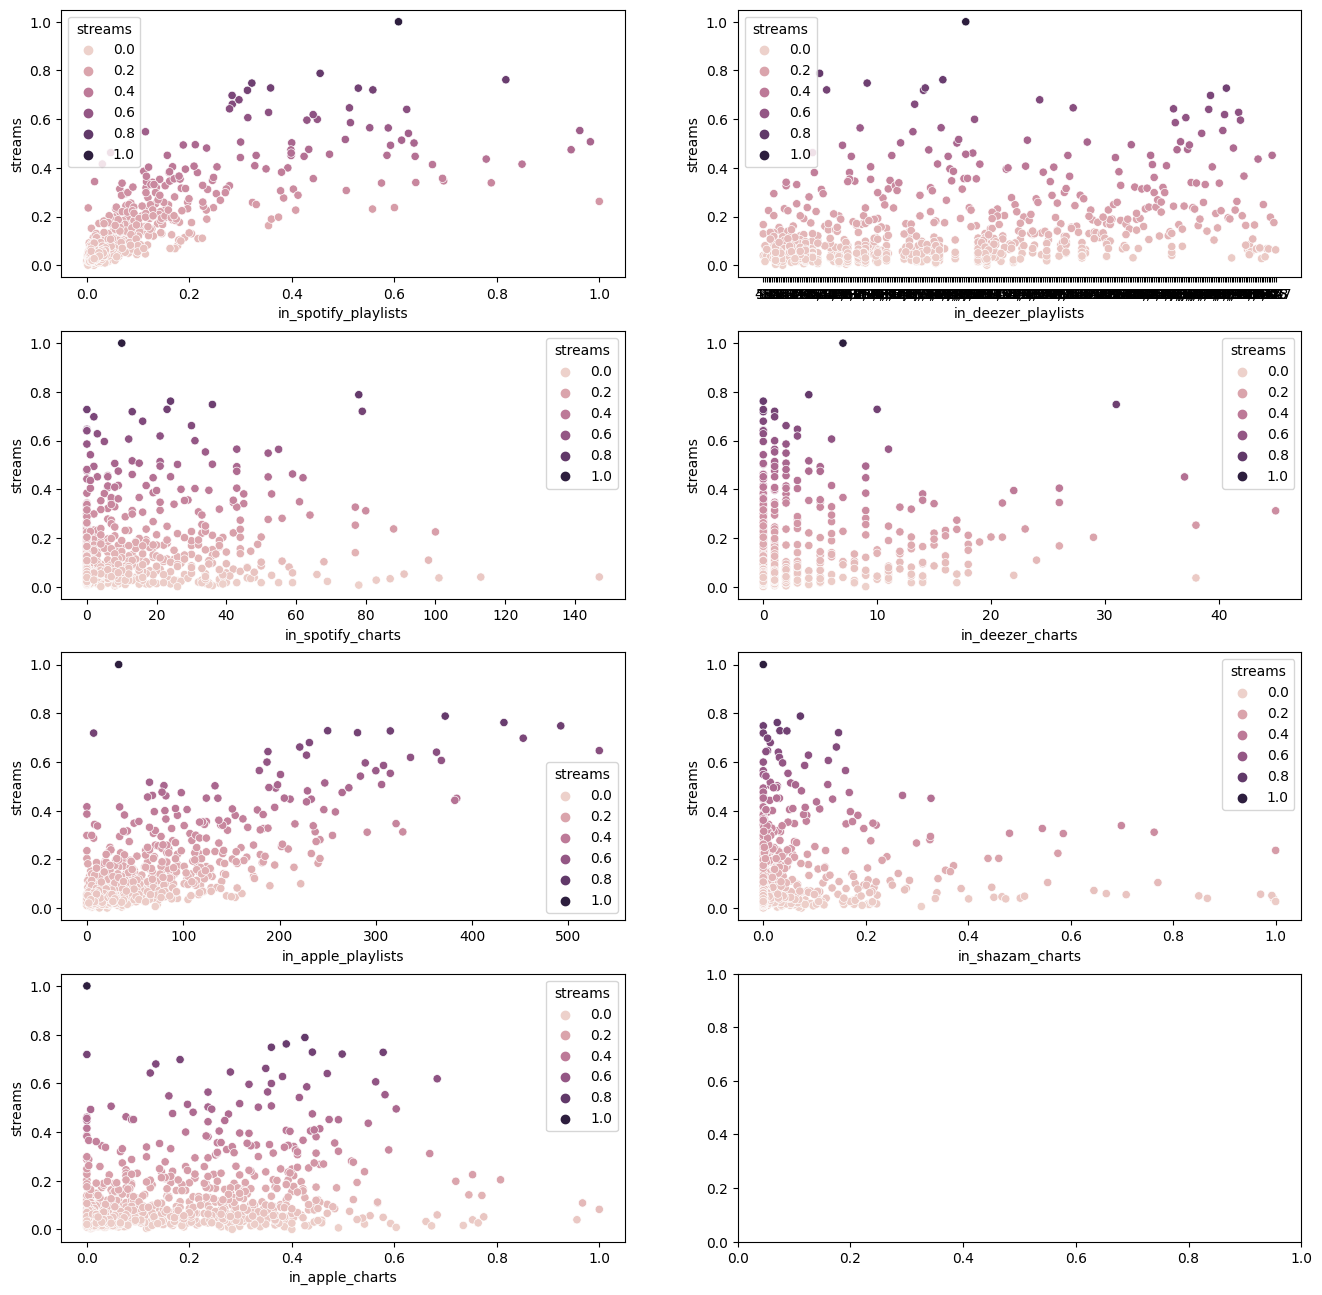

In [29]:
#Plotting the relation between high number of streams with song mentions in different music streaming service mentions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))
sns.scatterplot(x="in_spotify_playlists", y="streams", data=scaled_df_charts, hue='streams', ax=axes[0, 0])
sns.scatterplot(x="in_spotify_charts", y="streams", data=scaled_df_charts, hue='streams', ax=axes[1, 0])
sns.scatterplot(x="in_apple_playlists", y="streams", data=scaled_df_charts, hue='streams', ax=axes[2, 0])
sns.scatterplot(x="in_apple_charts", y="streams", data=scaled_df_charts, hue='streams', ax=axes[3, 0])
sns.scatterplot(x="in_deezer_playlists", y="streams", data=scaled_df_charts, hue='streams', ax=axes[0, 1])
sns.scatterplot(x="in_deezer_charts", y="streams", data=scaled_df_charts, hue='streams', ax=axes[1, 1])
sns.scatterplot(x="in_shazam_charts", y="streams", data=scaled_df_charts, hue='streams', ax=axes[2, 1])

#**Analysis**

##Streams VS In-spotify-playlist:
If a song is in a spotify playlist, it is likely to be streamed but as the presence of the song increases in different playlists, the numbers of streams also increases linearly.

##Streams VS In-deezer-playlist:
If a song is in a deezer playlist, it has a chance of having a high streaming numbers, as the datapoints are evenly spread out in the plot. The songs have good streaming number no matter if they are in less number of paylists or not.

##Streams VS In-spotify-charts:
The less number of charts a song is mentioned in, more likely it has high streams on spotify. As the number of chart mentions increases, the number of streams go down.

##Streams VS In-deezer-charts:
The less number of charts a song is mentioned in, more likely it has high streams on deezer. As the number of chart mentions increases, the number of streams go down with a few exceptions.

##Streams VS In-apple-playlist:
If a song is in a apple playlist, it is likely to be streamed but as the presence of the song increases in different playlists, the numbers of streams also increases linearly.

##Streams VS In-apple-charts:
The less number of charts a song is mentioned in, more likely it has high streams on apple. As the number of chart mentions increases by a certain number, the number of streams does not go down as it did on spotify and deezer but it only goes down  if the number of song mention increases in too many charts.

##Streams VS In-shazam-charts:
The less number of charts a song is mentioned in, more likely it has high stream on shazam. As the number of chart mentions increases, the number of streams go down.

In [30]:
df_new.head()

,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability,valence,energy,acousticness,instrumentalness,liveness,speechiness,key_A,key_A#,key_B,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,0.009874,147,0.039685,43,0.956364,45,10,0.866737,125,80,89,83,31,0,8,4,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.027295,48,0.037533,48,0.458182,58,14,0.400839,92,71,61,74,7,0,10,4,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.025838,113,0.039298,94,0.752727,91,14,0.995803,138,51,32,53,17,0,31,6,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.148051,100,0.224794,116,0.752727,125,12,0.575026,170,55,58,72,11,0,11,15,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.058676,50,0.085117,84,0.483636,87,15,0.445960,144,65,23,80,14,63,11,6,1,0,0,0,0,0,0,0,0,0,0,0,1


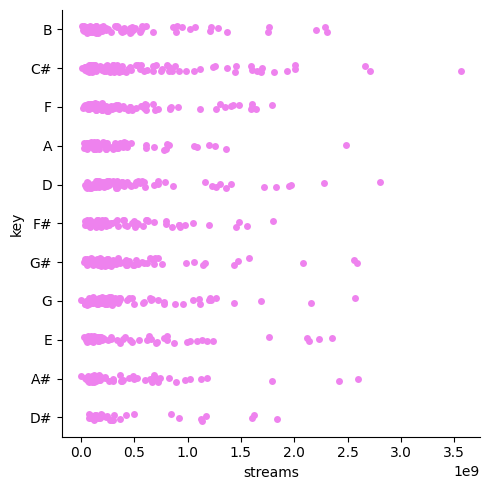

In [32]:
sns.catplot(x='streams', y='key', data = dataset, color='violet')

#**Analysis**
All the key notes have approximately equal number of streams but key note C-sharp has topped the most number of streams with a specific key note present in it.